# Pymaceuticals Inc.
---

### Analysis
The analysis of the correlation coefficient and linear regression model between mouse weight and average observed tumor volume for the entire Capomulin regimen provides valuable insights into the relationship between these two variables.

Correlation Coefficient:

The correlation coefficient quantifies the strength and direction of the linear relationship between two variables.
In this case, the correlation coefficient between mouse weight and average observed tumor volume is approximately 0.84.
A correlation coefficient close to 1 indicates a strong positive linear relationship between the two variables, suggesting that as mouse weight increases, the average observed tumor volume also tends to increase.
Linear Regression Model:

The linear regression model provides a mathematical representation of the relationship between mouse weight and average observed tumor volume.
The slope of the regression line is approximately 0.95, indicating that on average, for each unit increase in mouse weight (in grams), the average observed tumor volume increases by approximately 0.95 cubic millimeters.
The intercept of the regression line is approximately 21.55, representing the estimated average tumor volume when the mouse weight is zero. However, this interpretation may not be practically meaningful since mouse weight cannot be zero.
The R-squared value, which measures the proportion of the variance in the dependent variable (average tumor volume) that is predictable from the independent variable (mouse weight), is approximately 0.71. This indicates that approximately 71% of the variation in average tumor volume can be explained by variation in mouse weight, based on the linear regression model.
Visualization:

The scatter plot visually represents the relationship between mouse weight and average observed tumor volume for the Capomulin regimen.
The data points are scattered around the regression line, indicating the variability in tumor volume for mice with different weights.
The linear regression line provides a trendline that best fits the data points, illustrating the overall direction and strength of the relationship between mouse weight and average tumor volume.
Overall, the analysis suggests a strong positive linear relationship between mouse weight and average observed tumor volume for mice treated with the Capomulin regimen. However, it's important to note that correlation does not imply causation, and other factors may also influence tumor growth in addition to mouse weight.

 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
# Merge the mouse metadata and study results DataFrames on the "Mouse ID" column
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the combined DataFrame
print("Combined Data:")
print(combined_data.head())

# Display the data table for preview
print("Combined Data:")
print(combined_data.head())

Combined Data:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  
Combined Data:
  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male        

In [3]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

print("Number of unique mice:", num_mice)

Number of unique mice: 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on Mouse ID and Timepoint
duplicate_rows = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Extract the Mouse IDs of the duplicate rows
duplicate_mouse_ids = duplicate_rows["Mouse ID"].unique()

print("Duplicate Mouse IDs:")
print(duplicate_mouse_ids)

Duplicate Mouse IDs:
['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
# Filter the combined DataFrame to get all data for the duplicate mouse ID(s)
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

print("Data for Duplicate Mouse ID(s):")
print(duplicate_mouse_data)

Data for Duplicate Mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Femal

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Create a clean DataFrame by dropping duplicate mice based on Mouse ID and Timepoint
clean_data = combined_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Check the number of mice in the clean DataFrame
num_mice_clean = clean_data["Mouse ID"].nunique()

print("Number of unique mice after removing duplicates:", num_mice_clean)

Number of unique mice after removing duplicates: 249


In [7]:
# Checking the number of mice in the clean DataFrame.
# Check the number of mice in the clean DataFrame
num_mice_clean = clean_data["Mouse ID"].nunique()

print("Number of unique mice in the clean DataFrame:", num_mice_clean)

Number of unique mice in the clean DataFrame: 249


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Group the clean data by drug regimen and calculate summary statistics
summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename columns for clarity
summary_stats = summary_stats.rename(columns={"mean": "Mean Tumor Volume",
                                              "median": "Median Tumor Volume",
                                              "var": "Tumor Volume Variance",
                                              "std": "Tumor Volume Std. Dev.",
                                              "sem": "Tumor Volume SEM"})

# Display the summary statistics DataFrame
print("Summary Statistics of Tumor Volume by Drug Regimen:")
print(summary_stats)

Summary Statistics of Tumor Volume by Drug Regimen:
              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Generate summary statistics table in a single line using the aggregation method
summary_stats_single_line = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={"mean": "Mean Tumor Volume", "median": "Median Tumor Volume", "var": "Tumor Volume Variance", "std": "Tumor Volume Std. Dev.", "sem": "Tumor Volume SEM"})

# Display the summary statistics DataFrame
print("Summary Statistics of Tumor Volume by Drug Regimen:")
print(summary_stats_single_line)

Summary Statistics of Tumor Volume by Drug Regimen:
              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   


## Bar and Pie Charts

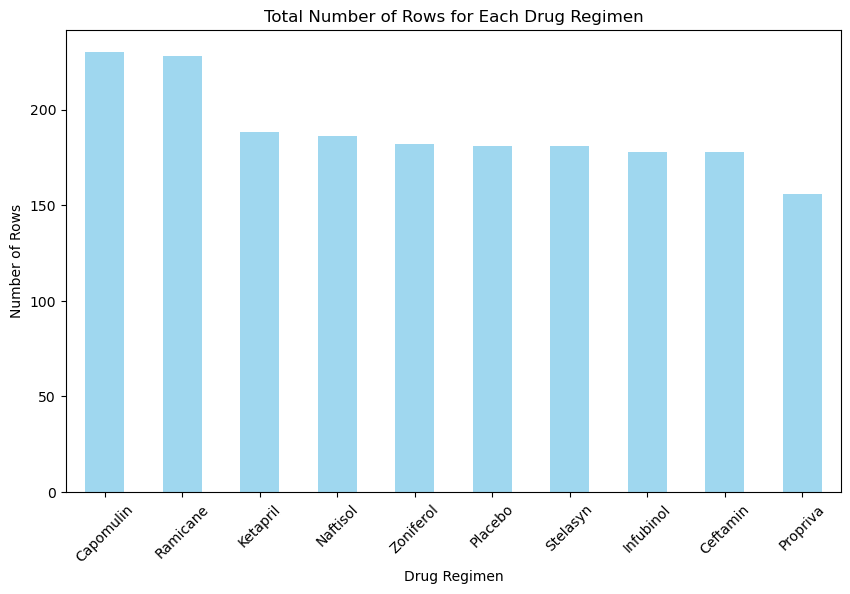

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Create a bar plot
drug_regimen_counts.plot(kind="bar", figsize=(10, 6), color="skyblue", alpha=0.8)

# Set the title and labels
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

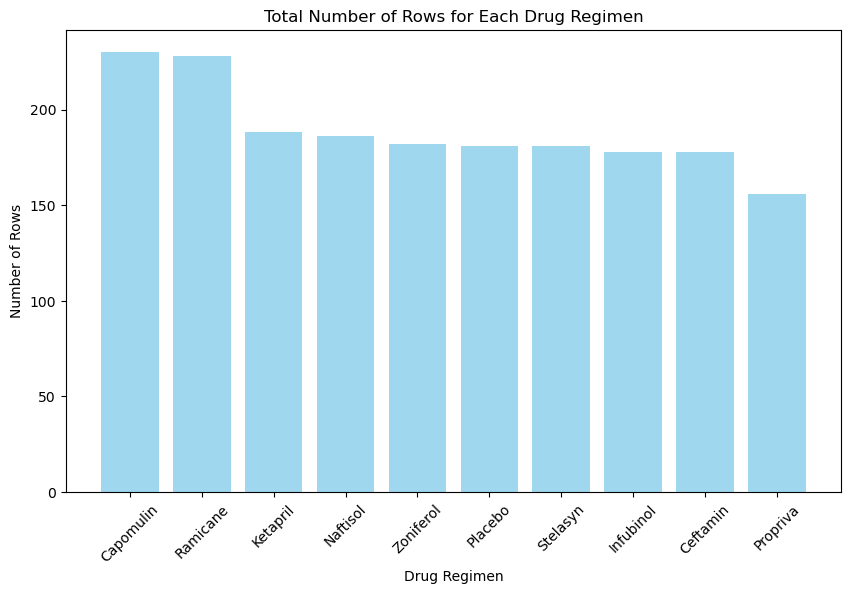

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# Extract drug regimen names and corresponding counts
regimens = drug_regimen_counts.index
counts = drug_regimen_counts.values

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='skyblue', alpha=0.8)

# Set the title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

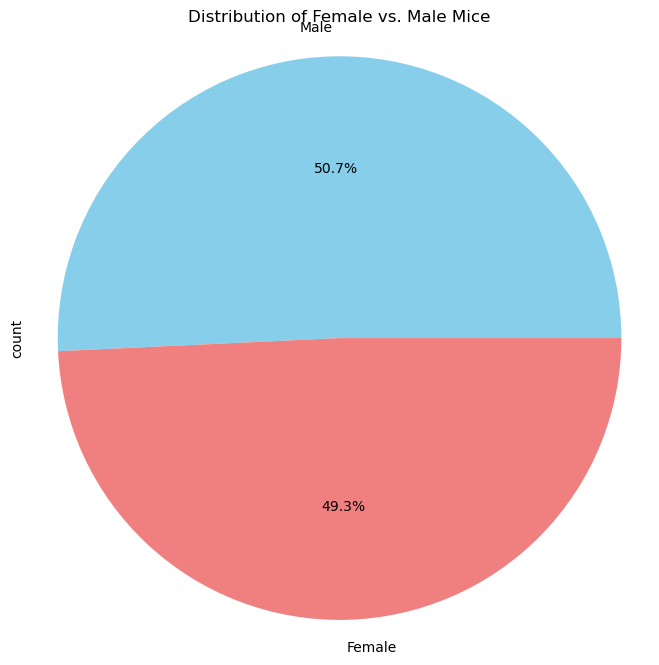

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Calculate the distribution of female versus male mice
gender_distribution = clean_data["Sex"].value_counts()

# Create a pie plot
gender_distribution.plot(kind="pie", figsize=(8, 8), autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the title
plt.title("Distribution of Female vs. Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

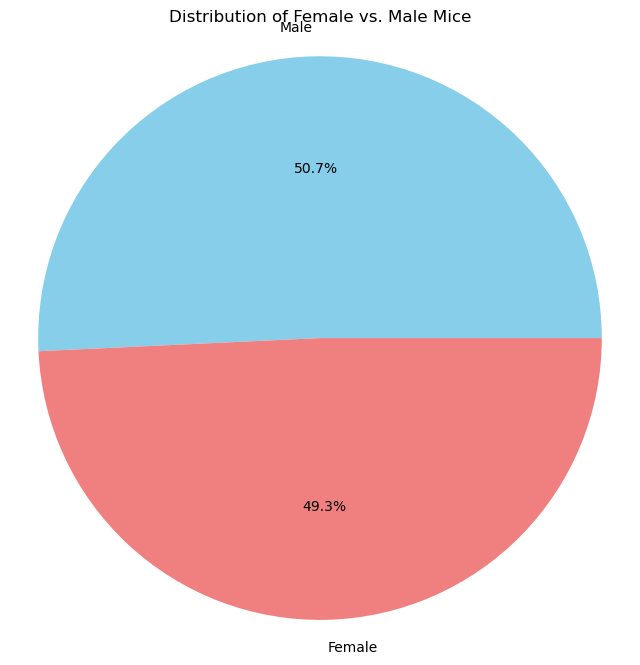

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Calculate the distribution of female versus male mice
gender_distribution = clean_data["Sex"].value_counts()

# Create the pie plot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])

# Set the title
plt.title("Distribution of Female vs. Male Mice")

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Filter the clean data to include only the four treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = clean_data[clean_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

# Group the data by Mouse ID and find the maximum timepoint for each mouse
max_timepoints = selected_regimens.groupby("Mouse ID")["Timepoint"].max()

# Merge the max_timepoints DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, selected_regimens, on=["Mouse ID", "Timepoint"], how="left")

# Display the DataFrame containing the final tumor volume for each mouse across the selected treatment regimens
print("Final Tumor Volume for Each Mouse:")
print(final_tumor_volume)

Final Tumor Volume for Each Mouse:
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0      a203         45    Infubinol  Female          20          23   
1      a251         45    Infubinol  Female          21          25   
2      a275         45     Ceftamin  Female          20          28   
3      a411         45     Ramicane    Male           3          22   
4      a444         45     Ramicane  Female          10          25   
..      ...        ...          ...     ...         ...         ...   
95     y769         45     Ceftamin  Female           6          27   
96     y793         45    Capomulin    Male          17          17   
97     y865         45     Ceftamin    Male          23          26   
98     z578         45     Ramicane    Male          11          16   
99     z581         45    Infubinol  Female          24          25   

    Tumor Volume (mm3)  Metastatic Sites  
0            67.973419                 2  
1            65.525743    

In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
# List of treatment regimens for the for loop and later for plot labels
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset to tumor volume data list
    tumor_volume_data.append(tumor_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine the lower and upper bounds for potential outliers
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Check for potential outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Print summary statistics and potential outliers for each treatment regimen
    print(f"Summary statistics for {treatment}:")
    print(f"Lower Quartile: {lower_quartile}")
    print(f"Upper Quartile: {upper_quartile}")
    print(f"Interquartile Range (IQR): {iqr}")
    print(f"Median: {quartiles[0.5]}")
    print(f"Potential outliers: {outliers}\n")

Summary statistics for Capomulin:
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
Interquartile Range (IQR): 7.781863460000004
Median: 38.1251644
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary statistics for Ramicane:
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
Interquartile Range (IQR): 9.098536719999998
Median: 36.56165229
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Summary statistics for Infubinol:
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
Interquartile Range (IQR): 11.477135160000003
Median: 60.16518046
Potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Summary statistics for Ceftamin:
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
Interquartile Range (IQR): 15.577752179999997
Median: 59.85195552
Potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



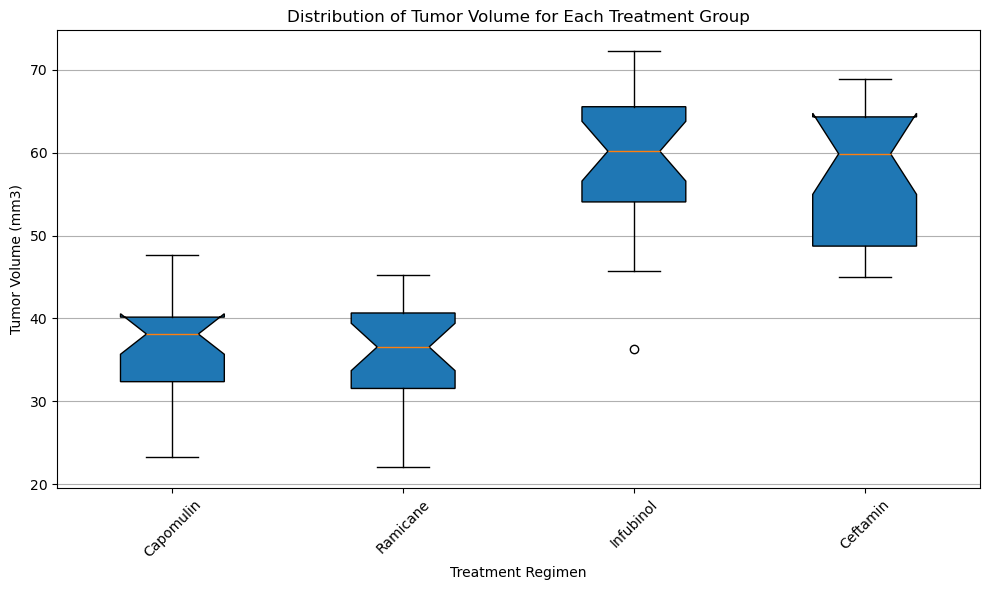

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True, notch=True)

# Set the title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Line and Scatter Plots

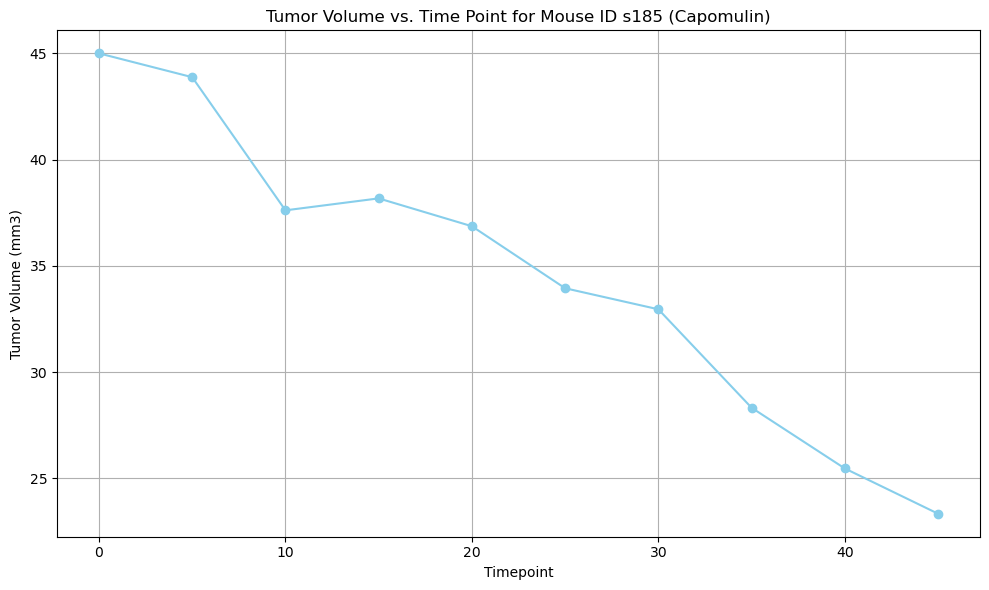

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
import matplotlib.pyplot as plt

# Choose a specific mouse ID treated with Capomulin
mouse_id = 's185'

# Filter the clean data for the selected mouse ID and Capomulin treatment regimen
mouse_data = clean_data[(clean_data['Mouse ID'] == mouse_id) & (clean_data['Drug Regimen'] == 'Capomulin')]

# Plot tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='skyblue')

# Set the title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse ID {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

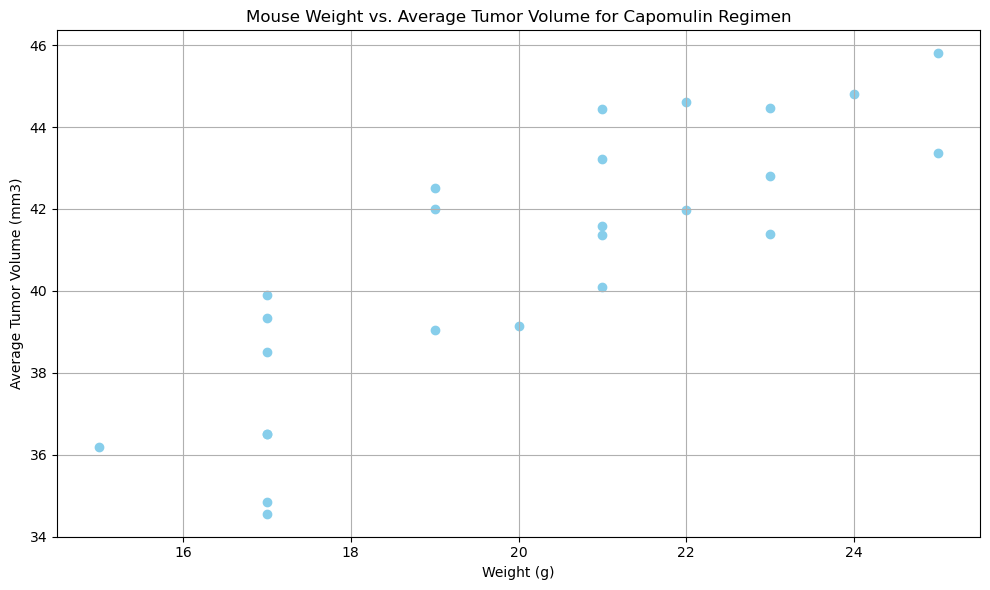

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt

# Filter the clean data for the Capomulin regimen
capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse treated with Capomulin
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse metadata to include mouse weight
avg_tumor_volume_df = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Generate the scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'], color='skyblue')

# Set the title and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694721
Slope of the regression line: 0.9544396890241049
Intercept of the regression line: 21.552160532685008
R-squared value: 0.7088568047708723


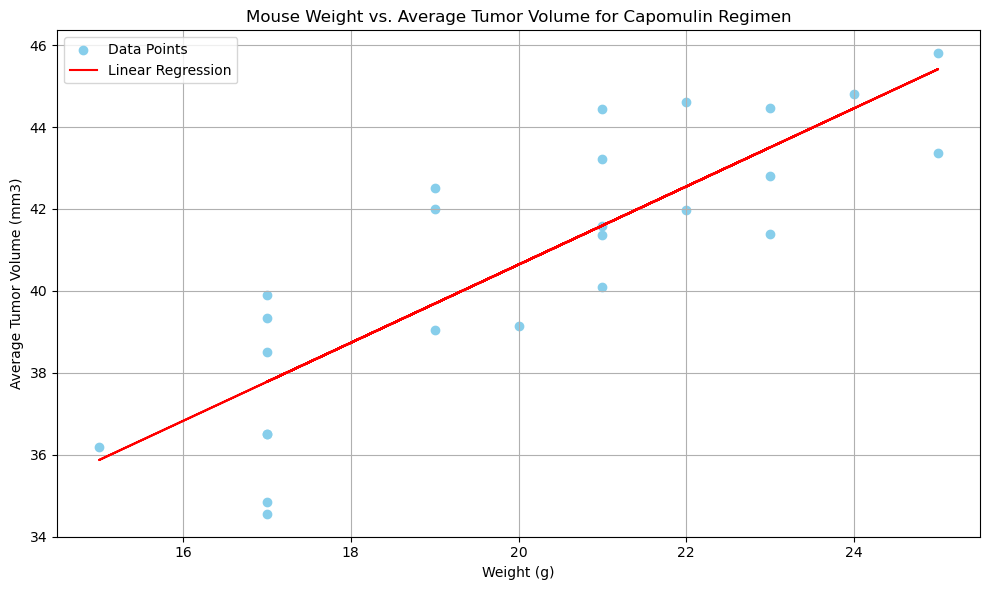

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
import scipy.stats as st

# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'])
print(f'Correlation Coefficient: {correlation_coefficient}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'])

# Print the slope and intercept of the regression line
print(f'Slope of the regression line: {slope}')
print(f'Intercept of the regression line: {intercept}')
print(f'R-squared value: {r_value**2}')

# Plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(avg_tumor_volume_df['Weight (g)'], avg_tumor_volume_df['Tumor Volume (mm3)'], color='skyblue', label='Data Points')
plt.plot(avg_tumor_volume_df['Weight (g)'], slope * avg_tumor_volume_df['Weight (g)'] + intercept, color='red', label='Linear Regression')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()